In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data=pd.read_csv('DailyDelhiClimateTest.csv')

In [3]:
data.drop(columns=['humidity','wind_speed','meanpressure'],inplace=True)

In [4]:
data.head()

,date,meantemp
0,1/1/2017,15.913043
1,1/2/2017,18.500000
2,1/3/2017,17.111111
3,1/4/2017,18.700000
4,1/5/2017,18.388889


<AxesSubplot:xlabel='date', ylabel='meantemp'>

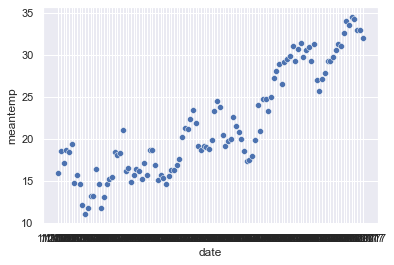

In [5]:
sns.scatterplot(x=data['date'],y=data['meantemp'])

# vt=Bvt-1+(1-B)0t

In [6]:
v=[]
beta=0.1
theta=data.iloc[:,-1]
ewma=[]
for i in range(data.shape[0]):
    if i==0:
        v.append(theta[i])
        ewma.append(v[i])
    else:
        v.append(beta*v[i-1]+(1-beta)*theta[i])
        ewma.append(v[i])

In [7]:
#user defined version
data['ewma']=ewma

#using pandas implicit version
data['pd_ewma']=data['meantemp'].ewm(alpha=0.9).mean()

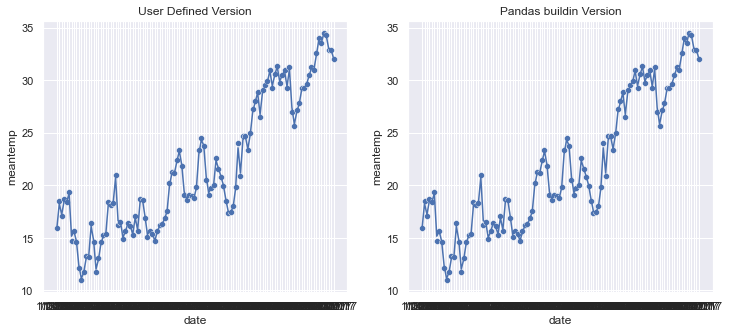

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=data['date'],y=data['meantemp'])
plt.plot(data['date'],data['ewma'])
plt.title("User Defined Version")
plt.subplot(1,2,2)
sns.scatterplot(x=data['date'],y=data['meantemp'])
plt.plot(data['date'],data['pd_ewma'])
plt.title("Pandas buildin Version")
plt.show()